In [2]:
print("Hello, World")

Hello, World


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from textblob import TextBlob
from nltk import sent_tokenize
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
driver = webdriver.Chrome() #Initialize Selenium WebDriver (opens Chrome browser)
#create empty lists to store the user data such as names,ratings, reviews and region
name = []
rating = []
review = []
region = []
url = """https://www.flipkart.com/apple-iphone-15-pink-128-gb/product-reviews/itm7579ed94ca647?pid=MOBGTAGPNMZA5PU5&lid=LSTMOBGTAGPNMZA5PU5E1UCRJ&
marketplace=FLIPKART&page="""

for page_num in range(1,20):
    new_url = url+str(page_num)
    driver.get(new_url)     #Open the page in Chrome
    time.sleep(3)   #Wait for JavaScript content to fully load
    soup = BeautifulSoup(driver.page_source,"html.parser")  #Parse the page content

# requests.get(url) is used to fetch a webpage, but it only retrieves static HTML but Flipkart is a dynamic page
    #extract customer names
    Names = soup.find_all("p",{"class":"_2NsDsF AwS1CA"})
    for n in Names:
        name.append(n.text)
        
    #extract customer ratings
    Ratings = soup.find_all("div",{"class":"XQDdHH Ga3i8K"})
    for ra in Ratings:
        rating.append(ra.text)

    #extract customer reviews
    Reviews = soup.find_all("div",{"class":"ZmyHeo"})
    for re in Reviews:
        review.append(re.text)

    #extract customer region
    Region = soup.find_all("p",{"class":"MztJPv"})
    for reg in Region:
        region.append(reg.text)

driver.quit()    #Close the Selenium WebDriver (closes Chrome browser)
print("Names: ",name)
print("Ratings: ",rating)
print("Reviews: ",review)
print("Region: ",region)

Names:  ['Mousam  Guha Roy', 'bijaya mohanty', 'Ajin V', 'Nikhil Kumar', 'Prithivi Boruah', 'Akshay Meena', 'Flipkart Customer', 'Sheetla Prasad Maurya', 'Rahul Shedge', 'Saurabh Gothwad', 'Kriti Customer', 'Arunji Govindaraju', 'Rishabh  Jha', 'Raj Singh', 'Talim (sk)', 'mohit  yadav ', 'Sandip Mandal', 'AYUSH singh', 'Afzol  Hussain', 'Amit Biswas', 'Ankit  Verma ', 'Varsha Sadanand Salve', 'Suman Jain', 'VinodKUMAR VinodKUMAR', 'Flipkart Customer', 'Flipkart Customer', 'Praveen Kumar', 'CHETAN  TILWALIA ', 'Jayanta  Roy', 'Zeeshan Khan', 'SONAL PAL', 'Sharon Lepcha', 'Sajib Das', 'Akash  Deep', 'Bhaskar Sharma', 'SANDEEP SOMAN', 'Flipkart Customer', 'Shubhanker  Singh ', 'Jayanth Jai', 'Dev  Kumar ', 'Flipkart Customer', 'Akhilesh Bepari', 'Atul Negi', 'Anish Sanjay', 'RAHUL  SEN', 'Naveen S', 'Mukesh Kumar', 'SHASHANK PATHAK', 'Kishu Kumar', 'Abhijit Kumar', 'jay singh', 'Anwar Customer', 'Preenit  Rai', 'ANUP SINGH GAUTAM', 'Feroz Basha', 'ABIR  MODAK', 'Nitin Kumar', 'PROSIT DAS'

In [5]:
#create a dataframe for the extracted data
df = pd.DataFrame({"Customer Name":name, "Ratings":rating, "Reviews":review, "Region":region})
df

,Customer Name,Ratings,Reviews,Region
0,Mousam Guha Roy,4,Very niceREAD MORE,"Certified Buyer, Matialihat"
1,bijaya mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,"Certified Buyer, Baleshwar"
2,Ajin V,5,High quality camera😍READ MORE,"Certified Buyer, Balaghat"
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,"Certified Buyer, Meerut Division"
4,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE,"Certified Buyer, Bokajan"
...,...,...,...,...
164,Abnish Sen,5,SuperREAD MORE,"Certified Buyer, Kanpur"
165,Ajay G,5,"Back to iPhone family from android, best upgra...","Certified Buyer, Hyderabad"
166,Ritesh Kumar,5,Best phone nice camera and performanceREAD MORE,"Certified Buyer, Buxar District"
167,Arman Ali,5,Pros48MP Camera With 2x Zoom. Dynamic Island. ...,"Certified Buyer, Bettiah"


In [6]:
#2. Data Cleaning and Preprocessing:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  169 non-null    object
 1   Ratings        169 non-null    object
 2   Reviews        169 non-null    object
 3   Region         169 non-null    object
dtypes: object(4)
memory usage: 5.4+ KB


In [7]:
#Captialize the first letter of each word in Customer Name(Proper Case)
df["Customer Name"] = df["Customer Name"].str.title().str.strip()
df

,Customer Name,Ratings,Reviews,Region
0,Mousam Guha Roy,4,Very niceREAD MORE,"Certified Buyer, Matialihat"
1,Bijaya Mohanty,5,Just go for it.Amazing one.Beautiful camera wi...,"Certified Buyer, Baleshwar"
2,Ajin V,5,High quality camera😍READ MORE,"Certified Buyer, Balaghat"
3,Nikhil Kumar,5,Switch from OnePlus to iPhone I am stunned wit...,"Certified Buyer, Meerut Division"
4,Prithivi Boruah,5,Camera Quality Is Improved Loving ItREAD MORE,"Certified Buyer, Bokajan"
...,...,...,...,...
164,Abnish Sen,5,SuperREAD MORE,"Certified Buyer, Kanpur"
165,Ajay G,5,"Back to iPhone family from android, best upgra...","Certified Buyer, Hyderabad"
166,Ritesh Kumar,5,Best phone nice camera and performanceREAD MORE,"Certified Buyer, Buxar District"
167,Arman Ali,5,Pros48MP Camera With 2x Zoom. Dynamic Island. ...,"Certified Buyer, Bettiah"


In [8]:
#replacing "read more" in the reviews column & convert to lower case
df["Reviews"] = df["Reviews"].str.replace("READ MORE","").str.lower()
df

,Customer Name,Ratings,Reviews,Region
0,Mousam Guha Roy,4,very nice,"Certified Buyer, Matialihat"
1,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,"Certified Buyer, Baleshwar"
2,Ajin V,5,high quality camera😍,"Certified Buyer, Balaghat"
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,"Certified Buyer, Meerut Division"
4,Prithivi Boruah,5,camera quality is improved loving it,"Certified Buyer, Bokajan"
...,...,...,...,...
164,Abnish Sen,5,super,"Certified Buyer, Kanpur"
165,Ajay G,5,"back to iphone family from android, best upgra...","Certified Buyer, Hyderabad"
166,Ritesh Kumar,5,best phone nice camera and performance,"Certified Buyer, Buxar District"
167,Arman Ali,5,pros48mp camera with 2x zoom. dynamic island. ...,"Certified Buyer, Bettiah"


In [9]:
#removing "Certified Buyer" and keeping the place name in Region column
df["Region"] = df["Region"].str.replace("Certified Buyer, ","").str.strip()
df

,Customer Name,Ratings,Reviews,Region
0,Mousam Guha Roy,4,very nice,Matialihat
1,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,Baleshwar
2,Ajin V,5,high quality camera😍,Balaghat
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,Meerut Division
4,Prithivi Boruah,5,camera quality is improved loving it,Bokajan
...,...,...,...,...
164,Abnish Sen,5,super,Kanpur
165,Ajay G,5,"back to iphone family from android, best upgra...",Hyderabad
166,Ritesh Kumar,5,best phone nice camera and performance,Buxar District
167,Arman Ali,5,pros48mp camera with 2x zoom. dynamic island. ...,Bettiah


In [10]:
#3 Sentiment Analysis

In [10]:
#Tokenizing the Reviews column as Reviews_1:
df["Reviews_1"] = df["Reviews"].apply(sent_tokenize)
df

,Customer Name,Ratings,Reviews,Region,Reviews_1
0,Mousam Guha Roy,4,very nice,Matialihat,[very nice]
1,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,Baleshwar,[just go for it.amazing one.beautiful camera w...
2,Ajin V,5,high quality camera😍,Balaghat,[high quality camera😍]
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,Meerut Division,[switch from oneplus to iphone i am stunned wi...
4,Prithivi Boruah,5,camera quality is improved loving it,Bokajan,[camera quality is improved loving it]
...,...,...,...,...,...
164,Abnish Sen,5,super,Kanpur,[super]
165,Ajay G,5,"back to iphone family from android, best upgra...",Hyderabad,"[back to iphone family from android, best upgr..."
166,Ritesh Kumar,5,best phone nice camera and performance,Buxar District,[best phone nice camera and performance]
167,Arman Ali,5,pros48mp camera with 2x zoom. dynamic island. ...,Bettiah,"[pros48mp camera with 2x zoom., dynamic island..."


In [11]:
#to get the polarity of the sentences
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]
df['Polarity'] = df['Reviews_1'].apply(get_polarity)

from statistics import mean   #to get the avg of the polaritites
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

df['Average_Polarity'] = df['Polarity'].apply(calculate_average_polarity)
df.head(10)

,Customer Name,Ratings,Reviews,Region,Reviews_1,Polarity,Average_Polarity
0,Mousam Guha Roy,4,very nice,Matialihat,[very nice],[0.78],0.780000
1,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,Baleshwar,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667
2,Ajin V,5,high quality camera😍,Balaghat,[high quality camera😍],[0.16],0.160000
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,Meerut Division,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000
4,Prithivi Boruah,5,camera quality is improved loving it,Bokajan,[camera quality is improved loving it],[0.6],0.600000
5,Akshay Meena,5,"so beautiful, so elegant, just a vowww😍❤️",Jaipur,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000
6,Flipkart Customer,5,awesome photography experience. battery backup...,Aizawl,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.733333
7,Sheetla Prasad Maurya,4,best mobile phonecamera quality is very nice b...,Sultanpur,[best mobile phonecamera quality is very nice ...,[0.738],0.738000
8,Rahul Shedge,5,totally happy!camera 5battery 5 display 5design 5,Satara,[totally happy!camera 5battery 5 display 5desi...,[0.0],0.000000
9,Saurabh Gothwad,5,simply premium.,Paradip,[simply premium.],[0.0],0.000000


In [20]:
#creating the function to know where the polarity lies
def sentiment(pol):
    if pol >= 0.75:
        return "Extremely Positive"
    elif pol > 0:
        return "Postive"
    elif pol == 0:
        return "Neutral"
    elif pol <= -0.75:
        return "Negative"
    else:
        return "Extremely Negative"
df["sentiment"] = df["Average_Polarity"].apply(sentiment)
df.head(10)

,Customer Name,Ratings,Reviews,Region,Reviews_1,Polarity,Average_Polarity,sentiment,Review Length,Rating
0,Mousam Guha Roy,4,very nice,Matialihat,[very nice],[0.78],0.780000,Extremely Positive,2,4
1,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,Baleshwar,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667,Postive,10,5
2,Ajin V,5,high quality camera😍,Balaghat,[high quality camera😍],[0.16],0.160000,Postive,3,5
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,Meerut Division,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000,Postive,17,5
4,Prithivi Boruah,5,camera quality is improved loving it,Bokajan,[camera quality is improved loving it],[0.6],0.600000,Postive,6,5
5,Akshay Meena,5,"so beautiful, so elegant, just a vowww😍❤️",Jaipur,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.675000,Postive,7,5
6,Flipkart Customer,5,awesome photography experience. battery backup...,Aizawl,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.733333,Postive,15,5
7,Sheetla Prasad Maurya,4,best mobile phonecamera quality is very nice b...,Sultanpur,[best mobile phonecamera quality is very nice ...,[0.738],0.738000,Postive,16,4
8,Rahul Shedge,5,totally happy!camera 5battery 5 display 5design 5,Satara,[totally happy!camera 5battery 5 display 5desi...,[0.0],0.000000,Neutral,7,5
9,Saurabh Gothwad,5,simply premium.,Paradip,[simply premium.],[0.0],0.000000,Neutral,2,5


In [21]:
#4. Data Analysis and Insights:
#This will calculate and also print the mean polarity value
df["Average_Polarity"].mean()

np.float64(0.4741037885428911)

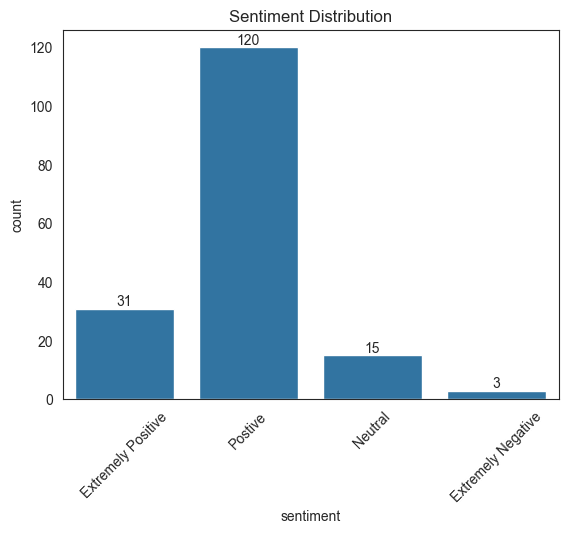

In [14]:
sns.set_style("white")  # Clean, no gridlines
ax = sns.countplot(x = df["sentiment"]) #creating a Seaborn chart on the sentiments
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.title("Sentiment Distribution")
plt.show()

In [15]:
#create a new column to know the number of words in reviews
df["Review Length"] = df["Reviews"].apply(lambda x : len(x.split()))
df

,Customer Name,Ratings,Reviews,Region,Reviews_1,Polarity,Average_Polarity,sentiment,Review Length
0,Mousam Guha Roy,4,very nice,Matialihat,[very nice],[0.78],0.780000,Extremely Positive,2
1,Bijaya Mohanty,5,just go for it.amazing one.beautiful camera wi...,Baleshwar,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.266667,Postive,10
2,Ajin V,5,high quality camera😍,Balaghat,[high quality camera😍],[0.16],0.160000,Postive,3
3,Nikhil Kumar,5,switch from oneplus to iphone i am stunned wit...,Meerut Division,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.500000,Postive,17
4,Prithivi Boruah,5,camera quality is improved loving it,Bokajan,[camera quality is improved loving it],[0.6],0.600000,Postive,6
...,...,...,...,...,...,...,...,...,...
164,Abnish Sen,5,super,Kanpur,[super],[0.3333333333333333],0.333333,Postive,1
165,Ajay G,5,"back to iphone family from android, best upgra...",Hyderabad,"[back to iphone family from android, best upgr...","[0.5, 0.5, -0.03571428571428571, 0.21333333333...",0.294405,Postive,43
166,Ritesh Kumar,5,best phone nice camera and performance,Buxar District,[best phone nice camera and performance],[0.8],0.800000,Extremely Positive,6
167,Arman Ali,5,pros48mp camera with 2x zoom. dynamic island. ...,Bettiah,"[pros48mp camera with 2x zoom., dynamic island...","[0.0, 0.0, 0.0, 1.0, 0.0, -0.30000000000000004...",0.094444,Postive,72


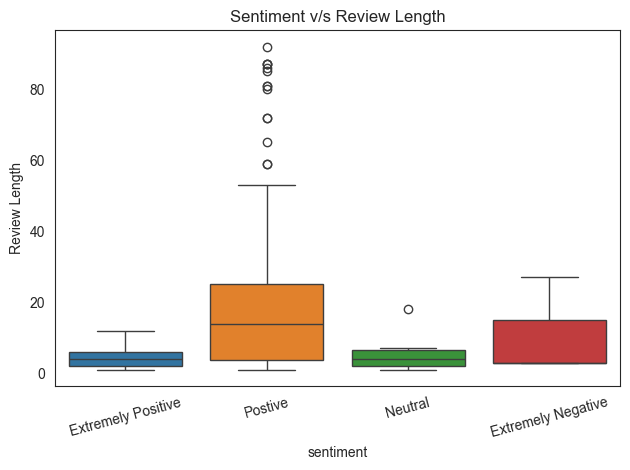

In [16]:
sns.boxplot(x= "sentiment", y= "Review Length", data = df, hue ="sentiment")
plt.xlabel("sentiment")
plt.ylabel("Review Length")
plt.xticks(rotation = 15)
plt.title("Sentiment v/s Review Length")
plt.tight_layout()
plt.show()

sentiment
Extremely Negative    4.333333
Extremely Positive    4.935484
Neutral               5.000000
Postive               4.875000
Name: Rating, dtype: float64


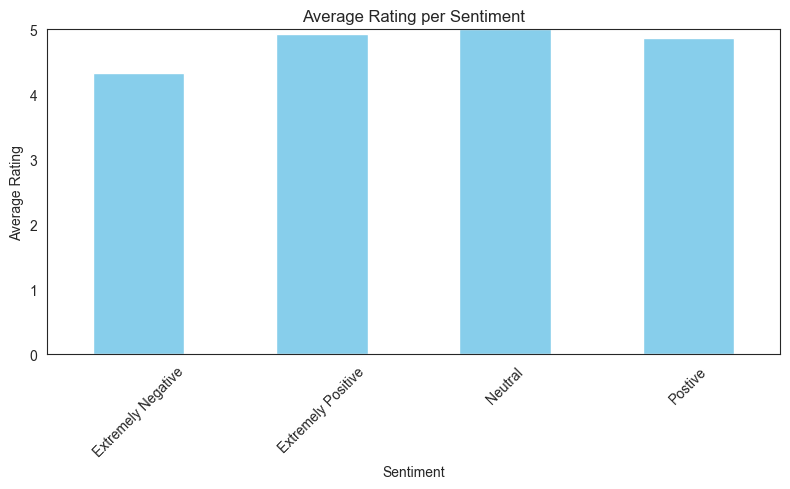

In [17]:
# avg_rating = df.groupby("sentiment")["Ratings"].mean().sort_values(ascending=False)
# print(avg_rating)
df["Rating"] = pd.to_numeric(df["Ratings"], errors="coerce")  # Make sure it's numeric
avg_rating = df.groupby("sentiment")["Rating"].mean()        # Group and get average
print(avg_rating)                                             # Show result

avg_rating = df.groupby("sentiment")["Rating"].mean()

avg_rating.plot(kind="bar", color="skyblue", figsize=(8, 5))
plt.title("Average Rating per Sentiment")
plt.ylabel("Average Rating")
plt.xlabel("Sentiment")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()